In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sy
from scipy.optimize import curve_fit

In [2]:
rate_1 = 4504/1175
cos_theta_1 = 1
rate_2 = 5342/1402
cos_theta_2 = 1
rate_3 = 713/2254
cos_theta_3 = 0
rate_4 = 1001/2092
cos_theta_4 = 0.24328859
rate_5 = 1001/738
cos_theta_5 = 0.5788
rate_6 = 1354/441
cos_theta_6 = 0.91482691
rate_7 = 2411/688
cos_theta_7 = 0.98490831
rate_8 = 2328/643
cos_theta_8 = 0.99215674

rate = np.array([rate_1, rate_2, rate_3, rate_4, rate_5, rate_6, rate_7])
cos_theta = np.array([cos_theta_1, cos_theta_2, cos_theta_3, cos_theta_4, cos_theta_5, cos_theta_6, cos_theta_7])

cos_theta_sq = []

for angle in cos_theta:
    cos_theta_sq = np.append(cos_theta_sq, angle*angle)
    


In [3]:
rate_r = np.array([rate_1, rate_2, rate_4, rate_5, rate_6, rate_7])
cos_theta_r = np.array([cos_theta_1, cos_theta_2, cos_theta_4, cos_theta_5, cos_theta_6, cos_theta_7])


cos_theta_sq_r = []
for angle in cos_theta_r:
    cos_theta_sq_r = np.append(cos_theta_sq_r, angle*angle)

In [4]:
def f(x, m, b):
    return m*x + b

In [5]:
sigma = []
for r in rate_r:
    sigma = np.append(sigma, 0.1)

In [6]:
opt_par, cov = curve_fit(f, cos_theta_sq_r, rate_r, sigma = sigma)

In [7]:
opt_par

array([3.50076357, 0.22428966])

In [8]:
print("error on m parameter = ", np.sqrt(cov[0][0]))
print("error on b parameter = ", np.sqrt(cov[1][1]))

error on m parameter =  0.11516030873569523
error on b parameter =  0.0911288011233535


slope of straight line =  3.500763569393451
intercept of straight line = 0.224289657306716


Text(0, 0.5, 'Rate[Hz]')

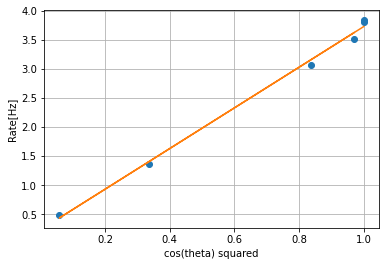

In [9]:
m, b = np.polyfit(cos_theta_sq_r, rate_r, 1)
plt.plot(cos_theta_sq_r, rate_r, 'o')
plt.plot(cos_theta_sq_r, m*cos_theta_sq_r + b)
print("slope of straight line = ", m)
print("intercept of straight line =", b)
plt.grid()
plt.xlabel("cos(theta) squared")
plt.ylabel("Rate[Hz]")